In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [37]:
dataset= pd.read_csv("stroke prediction.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [38]:
dataset.shape

(43400, 12)

In [39]:
dataset.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**43400 and 12 columns are there in our dataset**

In [40]:
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [41]:
dataset.isnull().sum()/dataset.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.033687
smoking_status       0.306267
stroke               0.000000
dtype: float64

**We have some null values in bmi and smoking_status. 
<br>BMI has 3% of the values missing whereas smoking_status has around 30%.
<br>Let us inspect these.**

In [42]:
dataset[dataset["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,NaN,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43317,2558,Female,62.0,0,1,Yes,Govt_job,Urban,72.29,NaN,never smoked,0
43339,10463,Female,76.0,0,0,No,Private,Rural,100.55,NaN,never smoked,1
43351,7580,Female,58.0,1,0,Yes,Private,Urban,99.29,NaN,NaN,0
43371,18119,Female,78.0,0,0,Yes,Private,Urban,182.45,NaN,formerly smoked,0


In [43]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Features that can be created- 
-Age and BMI
-BMI and avg_glucose_level
-Group by on Age and mean of bmi
-Finding out if a person has high blood sugar or not
-Adding age+avg_glucose_level+bmi
-
-

In [44]:
dataset["bmi"].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

**We seem to be having some outliers in our BMI variable**

In [45]:
display(dataset[dataset.bmi.isnull()].groupby("gender").count()["id"])
display(dataset[dataset.bmi.isnull()].groupby("hypertension").count()["id"])
display(dataset[dataset.bmi.isnull()].groupby("heart_disease").count()["id"])
display(dataset[dataset.bmi.isnull()].groupby("Residence_type").count()["id"])
display(dataset[dataset.bmi.isnull()].groupby("work_type").count()["id"])

gender
Female    720
Male      738
Other       4
Name: id, dtype: int64

hypertension
0    1071
1     391
Name: id, dtype: int64

heart_disease
0    1208
1     254
Name: id, dtype: int64

Residence_type
Rural    710
Urban    752
Name: id, dtype: int64

work_type
Govt_job         196
Never_worked       1
Private          850
Self-employed    319
children          96
Name: id, dtype: int64

**There doesn't seem any relation between null BMI values and gender**<br>
**Most of the people whose BMI values are not available are not suffering from Hypertension**<br>
**Most of the people whose BMI values are not available are not suffering from any Heart Disease**<br>
**Most of the people whose BMI values are not available are in a Private job**

## Univariate Analysis

In [46]:
def numerical_univ(data,var_name):
    
    from varname import nameof
    sns.set(palette="Set2")
    
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,7))
    
    details=data[var_name].describe()
    
    plt.suptitle(f"{var_name} \n Mean={details['mean'].round(2)} Std={details['std'].round(2)} \n Min,Max={(details['min'],details['max'])} Q1,Q2,Q3= {(details['25%'],details['50%'],details['75%'])} \n Kurtosis= {round(data[var_name].kurt(),3)} Skewness= {round(data[var_name].skew(),3)}")
    
    sns.distplot(data[var_name],ax=axes[0])
    sns.boxplot(data=data,x=var_name,ax=axes[1])
    
        

### ID

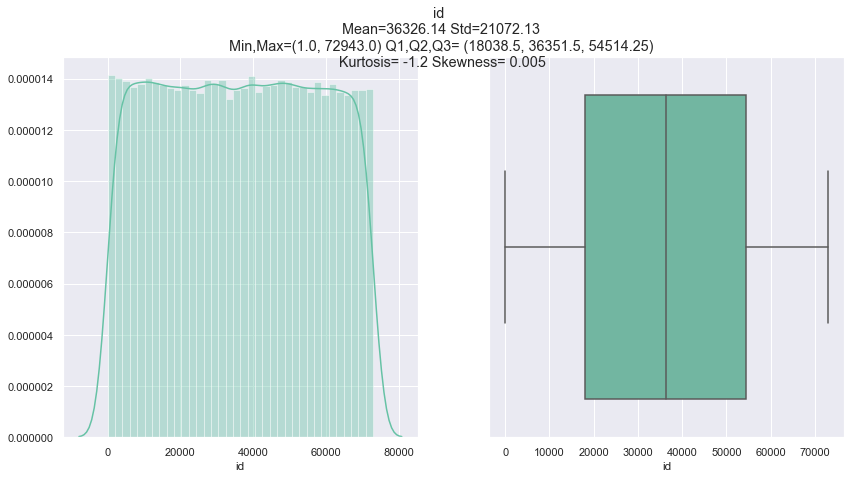

In [47]:
numerical_univ(dataset,"id")

**ID looks like a Uniform distribution, hence it seems as if ID is a unique identifier of each row**<br>
**We can drop ID**

In [48]:
dataset.drop(columns="id",axis=1,inplace=True)

### BMI

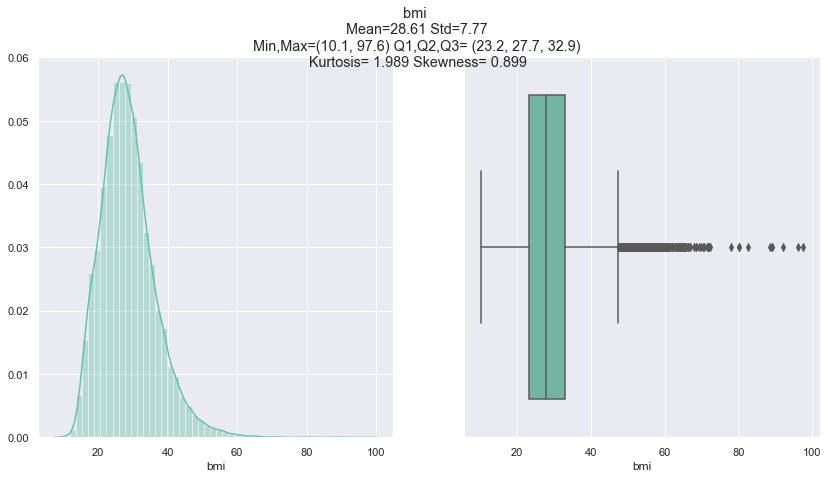

In [49]:
numerical_univ(dataset,"bmi")

**We have a few outliers in our bmi variable**

### Average Glucose Level

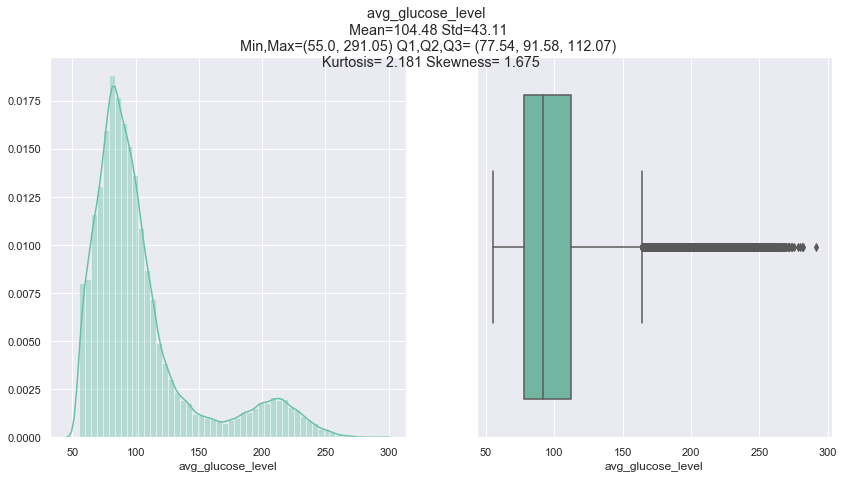

In [50]:
numerical_univ(dataset,"avg_glucose_level")

**We have a substantial number of outliers in avg_glucose_level**

### Age

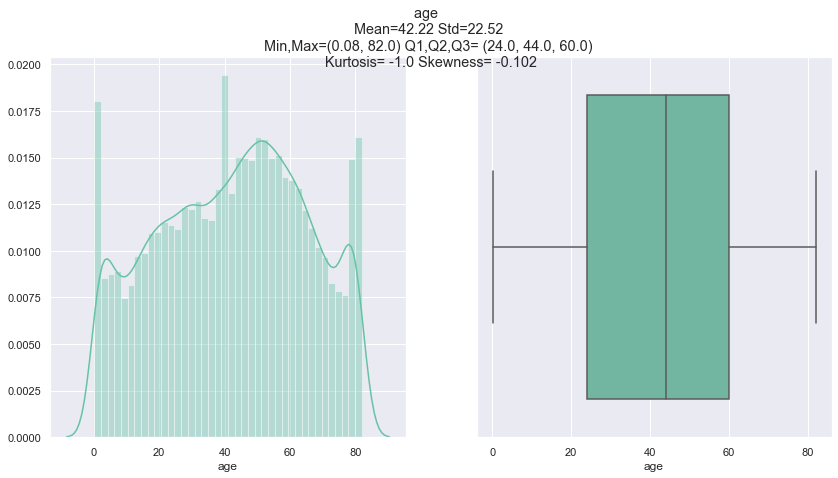

In [51]:
numerical_univ(dataset,"age")

In [52]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [53]:
dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Gender

In [54]:
dataset["gender"]=dataset["gender"].astype('category')

round((dataset["gender"].value_counts()*100)/dataset.shape[0],2)

Female    59.14
Male      40.84
Other      0.03
Name: gender, dtype: float64

**59.14% are Female as compared to 40.84% Males. There are few of others category.**

### Hypertension

In [55]:
dataset["hypertension"]=dataset["hypertension"].astype('category')

In [56]:
round((dataset["hypertension"].value_counts()*100)/dataset.shape[0],2)

0    90.64
1     9.36
Name: hypertension, dtype: float64

**Around 91% don't have Hypertension whereas around 9.36% have**
<br> We would want to see
1. Are Aged people more prone to having Hypertension 
2. Does Smoking lead to Hypertension
3. Do Males have Hypertension
4. Do Married people have Hypertension
5. Are working people more prone to being Hypertensed
6. Do High BMI people tend to be hypertensed
7. Do Hypertensed people get more Strokes

### Heart_Disease

In [146]:
dataset["heart_disease"]=dataset["heart_disease"].astype('category')

In [147]:
round((dataset["heart_disease"].value_counts()*100)/dataset.shape[0],2)

0    95.25
1     4.75
Name: heart_disease, dtype: float64

**Around 95% don't have Heart Diseases whereas around 5% have**

### Ever_Married

In [70]:
dataset["ever_married"].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
dataset["ever_married"]=dataset["ever_married"].astype('category')

round((dataset["ever_married"].value_counts()*100)/dataset.shape[0],2)

Yes    64.37
No     35.63
Name: ever_married, dtype: float64

**64% of people are married**

### Work_Type

In [26]:
dataset["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [27]:
dataset["work_type"]=dataset["work_type"].astype('category')

round((dataset["work_type"].value_counts()*100)/dataset.shape[0],2)

Private          57.22
Self-employed    15.65
children         14.18
Govt_job         12.53
Never_worked      0.41
Name: work_type, dtype: float64

### Residence_Type

In [24]:
dataset["Residence_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [162]:
dataset["Residence_type"]=dataset["Residence_type"].astype('category')

round((dataset["Residence_type"].value_counts()*100)/dataset.shape[0],2)

Urban    50.13
Rural    49.87
Name: Residence_type, dtype: float64

**We have equal number of people from Urban and Rural areas**

### Smoking_Status

In [163]:
dataset["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [164]:
dataset["smoking_status"]=dataset["smoking_status"].astype('category')

round((dataset["smoking_status"].value_counts()*100)/dataset.shape[0],2)

never smoked       36.99
formerly smoked    17.26
smokes             15.12
Name: smoking_status, dtype: float64

**Mostly, people don't smoke.**

### Stroke

In [28]:
dataset.stroke.value_counts()/dataset.shape[0]

0    0.981959
1    0.018041
Name: stroke, dtype: float64

**1.8% of the whole dataset have stroke.**

In [29]:
dataset.groupby(["work_type","stroke"]).count()["gender"]

work_type      stroke
Govt_job       0          5351.0
               1            89.0
Never_worked   0           177.0
               1             NaN
Private        0         24393.0
               1           441.0
Self-employed  0          6542.0
               1           251.0
children       0          6154.0
               1             2.0
Name: gender, dtype: float64

In [30]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [31]:
dataset[(dataset.age<10) & (dataset.stroke==1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9961,Female,1.32,0,0,No,children,Urban,70.37,NaN,NaN,1


In [32]:
dataset[(dataset.age<10)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.00,0,0,No,children,Rural,95.12,18.0,NaN,0
2,Female,8.00,0,0,No,Private,Urban,110.89,17.6,NaN,0
33,Female,3.00,0,0,No,children,Urban,73.74,16.0,NaN,0
42,Male,4.00,0,0,No,children,Rural,79.17,20.0,NaN,0
79,Male,8.00,0,0,No,children,Rural,78.05,25.7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43363,Female,8.00,0,0,No,children,Urban,90.75,16.8,NaN,0
43369,Male,1.72,0,0,No,children,Rural,81.38,17.8,NaN,0
43376,Female,3.00,0,0,No,children,Rural,83.32,21.3,NaN,0
43382,Female,9.00,0,0,No,children,Urban,68.49,16.8,NaN,0


In [33]:
dataset[(dataset.age<1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
116,Female,0.64,0,0,No,children,Urban,83.82,24.9,NaN,0
129,Female,0.88,0,0,No,children,Rural,88.11,15.5,NaN,0
323,Female,0.32,0,0,No,children,Rural,73.71,16.2,NaN,0
746,Male,0.88,0,0,No,children,Rural,157.57,19.2,NaN,0
761,Male,0.24,0,0,No,children,Rural,118.87,16.3,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43031,Female,0.32,0,0,No,children,Urban,91.86,17.6,NaN,0
43106,Male,0.32,0,0,No,children,Urban,90.38,16.1,NaN,0
43220,Female,0.08,0,0,No,children,Rural,125.11,12.1,NaN,0
43296,Male,0.56,0,0,No,children,Rural,78.07,21.9,NaN,0


## Bivariate Analysis

## Categorical-Categorical

In [149]:
def categorical_biv(data,tar,cat):
    
    data=data[[cat,tar]]
    
    
    print("Contingency Table:-")
    table=pd.crosstab(data[tar],data[cat])
    print(table)
    
    obs_freq= np.array([table.iloc[:,0].values, table.iloc[:,1].values])
    
    from scipy.stats import chi2_contingency
    
    chi,p,dof,expected = chi2_contingency(obs_freq)
    
    if p<0.05:
        sig=True
    else:
        sig=False
    
    fig,ax=plt.subplots(1,2,figsize=(14,7))
    
    # Grouped Countplot
    sns.set(palette='RdBu')
    sns.countplot(x=cat, hue=tar, data=data,ax=ax[0])
    ax[0].legend(loc='upper right')
    fig.suptitle(f"p-value = {round(p,3)}\n difference significant? = {sig}\n")
    
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar',ax=ax[1], stacked='True')
    
    ax[1].legend(loc='upper right')
    plt.show()

### Hypertension vs Other Variables

gender-Hypertension
Contingency Table:-
gender        Female   Male  Other
hypertension                      
0              23412  15916     11
1               2253   1808      0


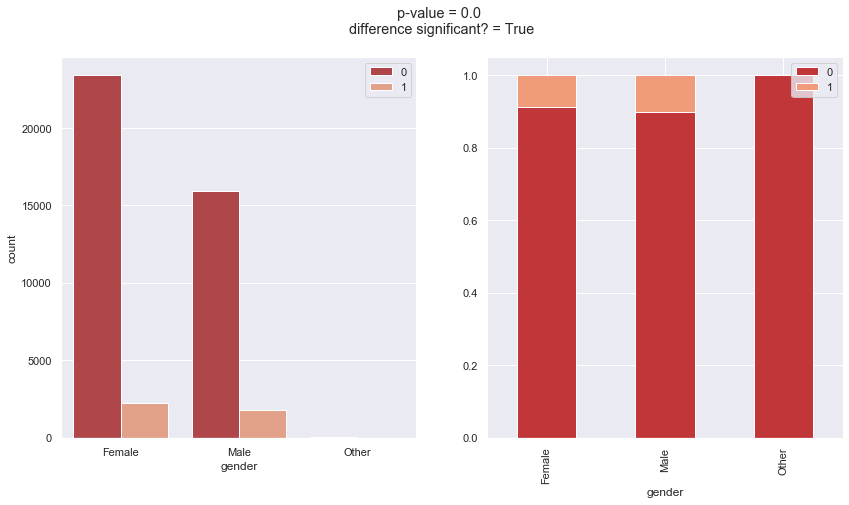

heart_disease-Hypertension
Contingency Table:-
heart_disease      0     1
hypertension              
0              37792  1547
1               3546   515


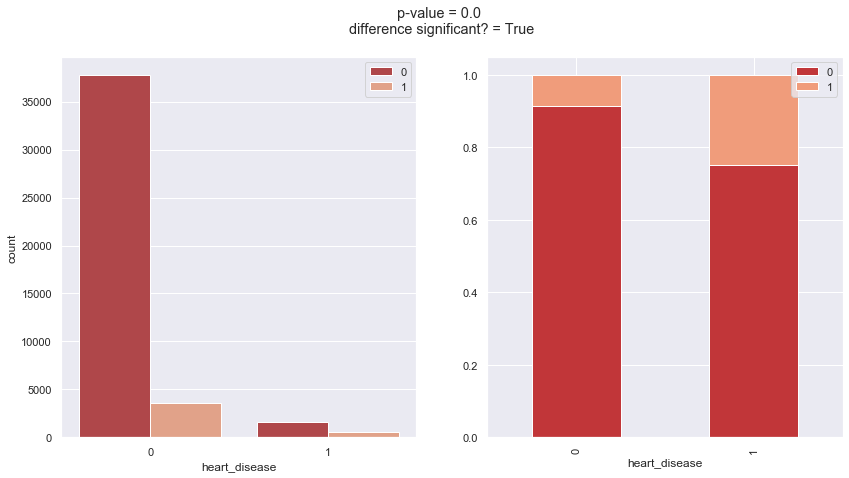

ever_married-Hypertension
Contingency Table:-
ever_married     No    Yes
hypertension              
0             15084  24255
1               378   3683


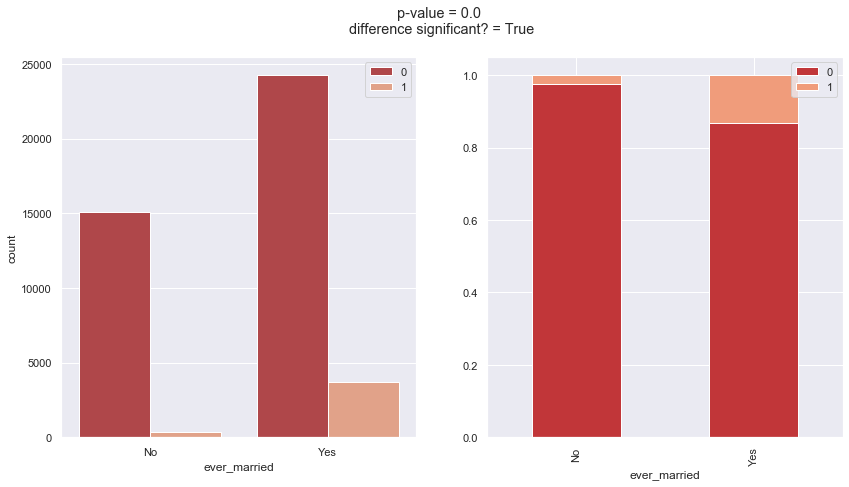

work_type-Hypertension
Contingency Table:-
work_type     Govt_job  Never_worked  Private  Self-employed  children
hypertension                                                          
0                 4847           176    22465           5697      6154
1                  593             1     2369           1096         2


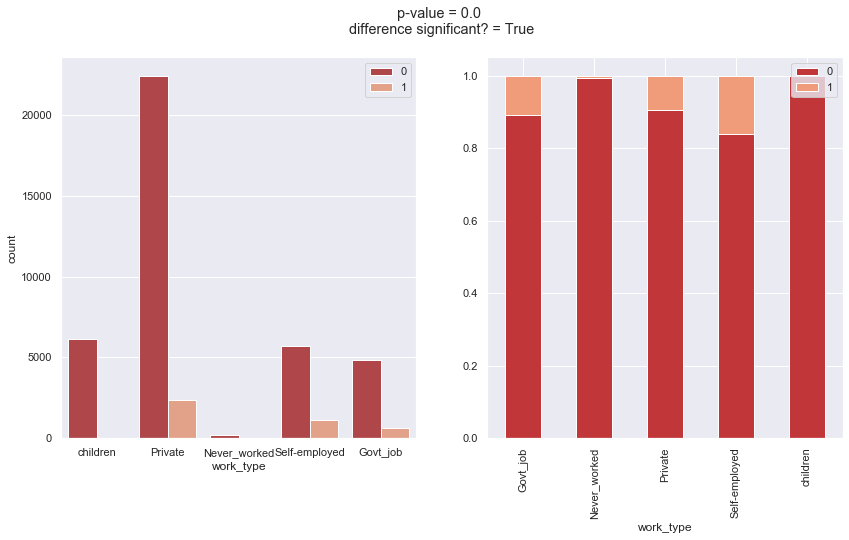

Residence_type-Hypertension
Contingency Table:-
Residence_type  Rural  Urban
hypertension                
0               19599  19740
1                2045   2016


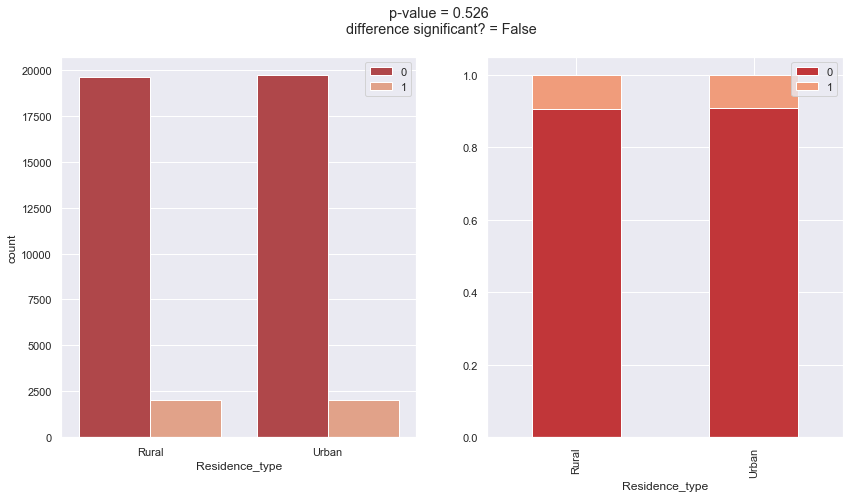

smoking_status-Hypertension
Contingency Table:-
smoking_status  formerly smoked  never smoked  smokes
hypertension                                         
0                          6449         14305    5826
1                          1044          1748     736


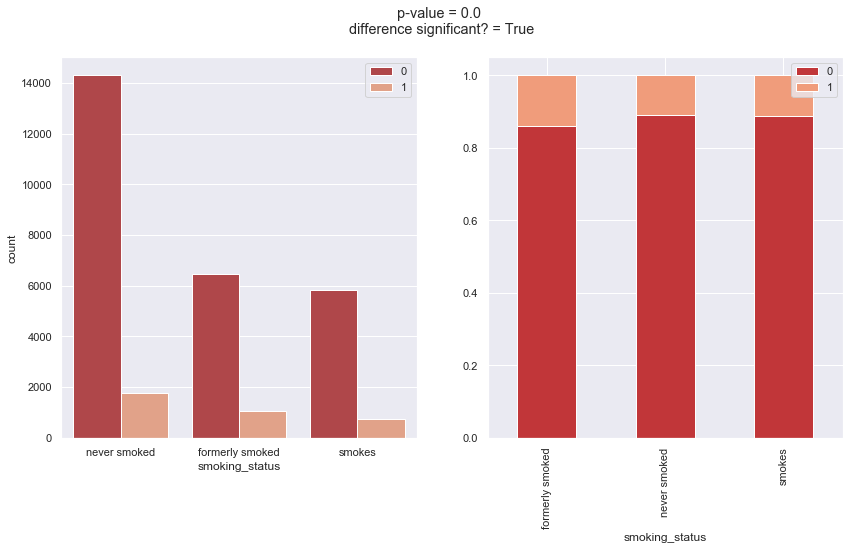

stroke-Hypertension
Contingency Table:-
stroke            0    1
hypertension            
0             38756  583
1              3861  200


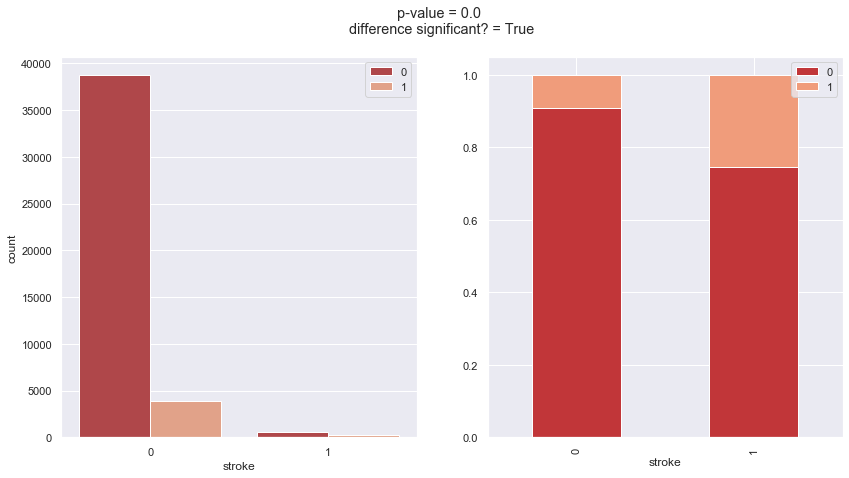

In [145]:
cols=["gender","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]

for i in cols:
    print(i+"-Hypertension")
    categorical_biv(dataset,"hypertension",i)

**Inferences-**
1. Higher proportion of Males have Hypertension than Females
2. Higher Proportion of People with Heart Diseases have Hypertension
3. Higher Proportion Married People have Hypertension than Unmarried
4. Self-Employed people are more likely to suffer from Hypertension
5. Rural and Urban people are equally likely to suffer from Hypertension
6. Smoking status also has an effect on Hypertension
7. Hypertensed people are more likely to suffer from a Stroke

### Heart_Disease vs Other Variables

gender-Heart Disease
Contingency Table:-
gender         Female   Male  Other
heart_disease                      
0               24819  16508     11
1                 846   1216      0


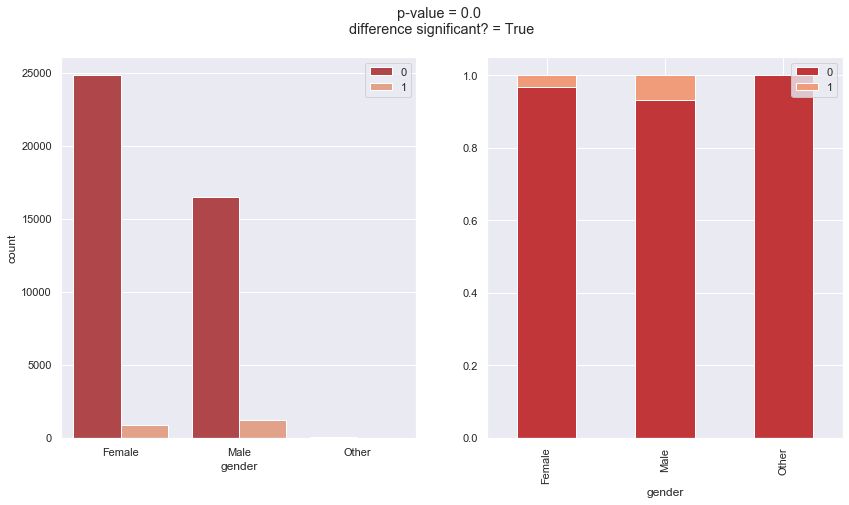

ever_married-Heart Disease
Contingency Table:-
ever_married      No    Yes
heart_disease              
0              15297  26041
1                165   1897


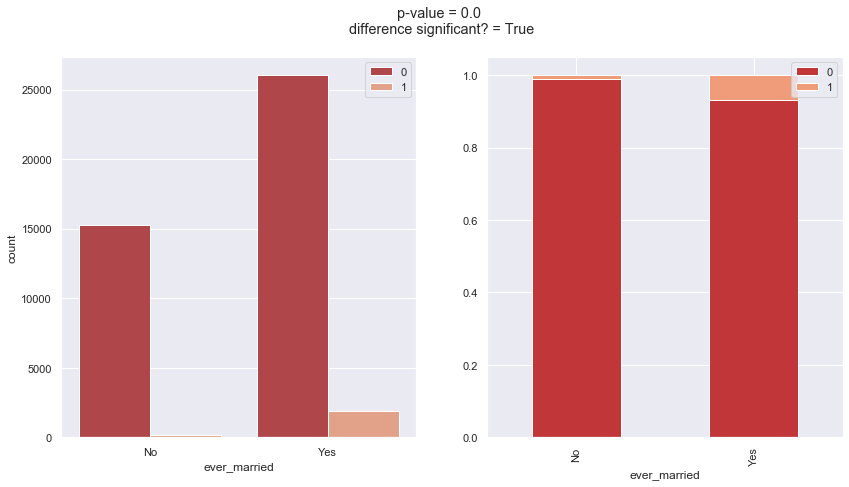

work_type-Heart Disease
Contingency Table:-
work_type      Govt_job  Never_worked  Private  Self-employed  children
heart_disease                                                          
0                  5189           177    23683           6137      6152
1                   251             0     1151            656         4


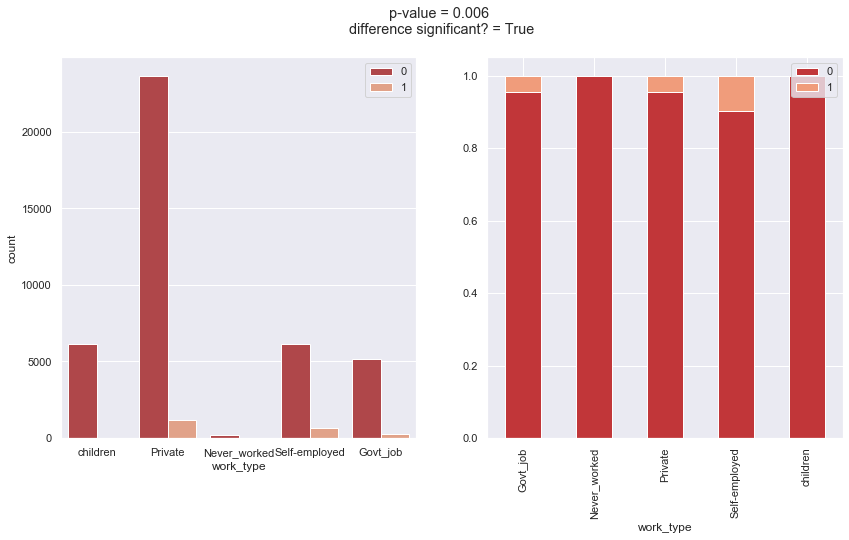

Residence_type-Heart Disease
Contingency Table:-
Residence_type  Rural  Urban
heart_disease               
0               20603  20735
1                1041   1021


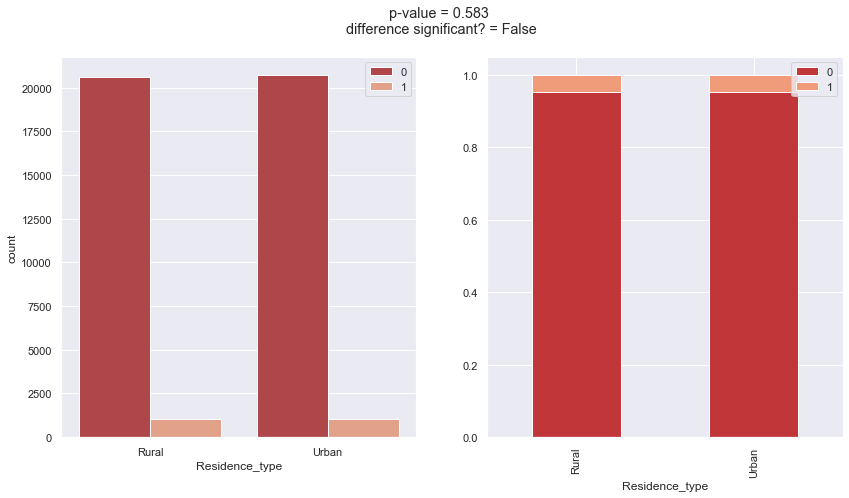

smoking_status-Heart Disease
Contingency Table:-
smoking_status  formerly smoked  never smoked  smokes
heart_disease                                        
0                          6846         15449    6135
1                           647           604     427


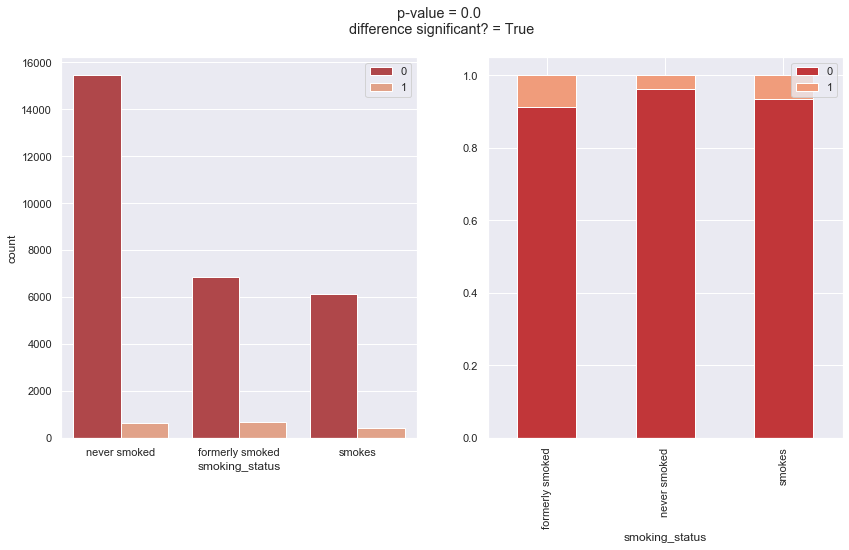

stroke-Heart Disease
Contingency Table:-
stroke             0    1
heart_disease            
0              40732  606
1               1885  177


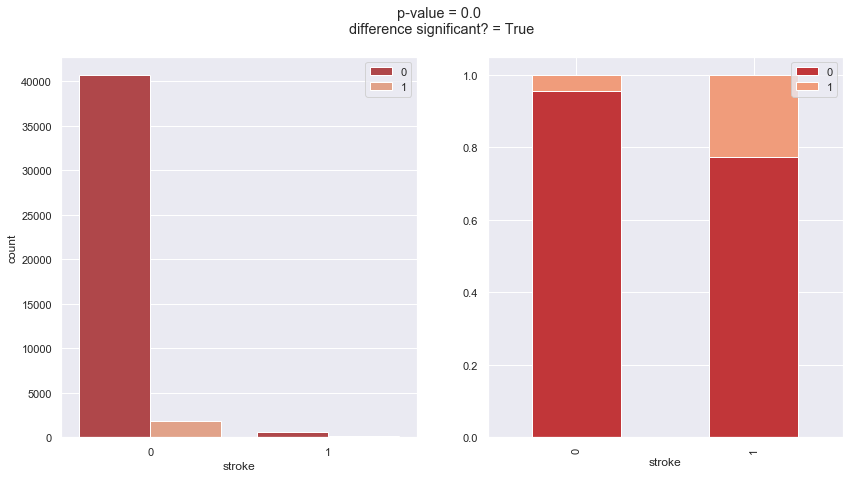

In [148]:
cols=["gender","ever_married","work_type","Residence_type","smoking_status","stroke"]

for i in cols:
    print(i+"-Heart Disease")
    categorical_biv(dataset,"heart_disease",i)

**Inferences-**
1. Males are more likely to suffer from a Heart Disease
2. Married People are more likely to suffer from a Heart Disease
3. Self-Employed People are more likely to suffer from a Heart Disease
4. People from Rural and Urban are equally likely to suffer from a Heart Disease
5. Smoking has an effect on occurance of Heart Disease
6. People with Heart Disease are more likely to have a Stroke

### Ever_Married vs Other Variables

gender-Ever_Married
Contingency Table:-
gender        Female   Male  Other
ever_married                      
No              8825   6631      6
Yes            16840  11093      5


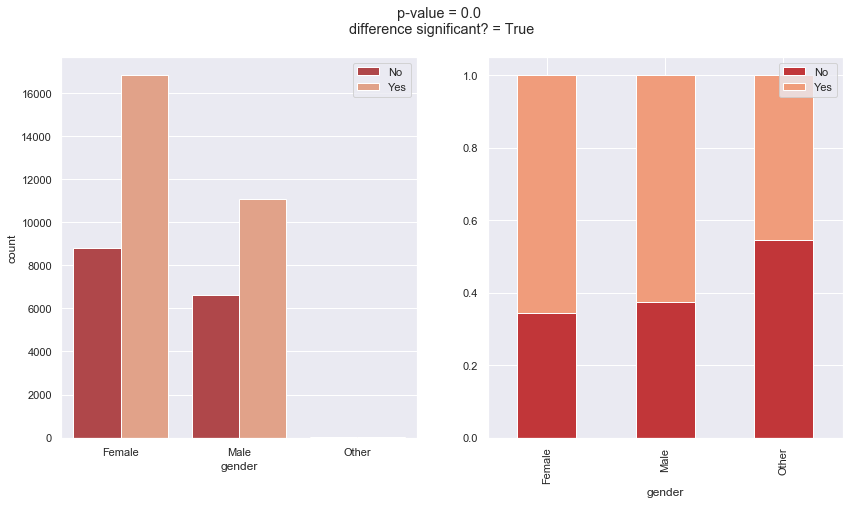

work_type-Ever_Married
Contingency Table:-
work_type     Govt_job  Never_worked  Private  Self-employed  children
ever_married                                                          
No                1007           170     7214            915      6156
Yes               4433             7    17620           5878         0


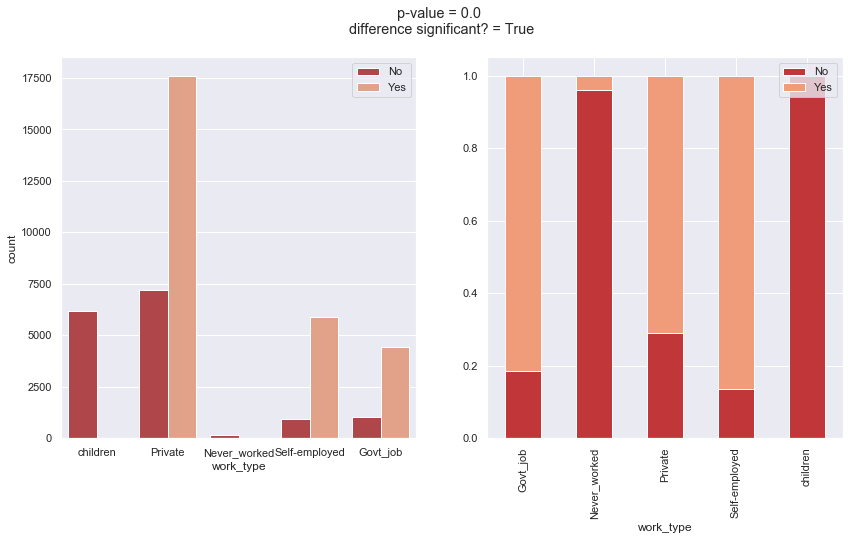

Residence_type-Ever_Married
Contingency Table:-
Residence_type  Rural  Urban
ever_married                
No               7757   7705
Yes             13887  14051


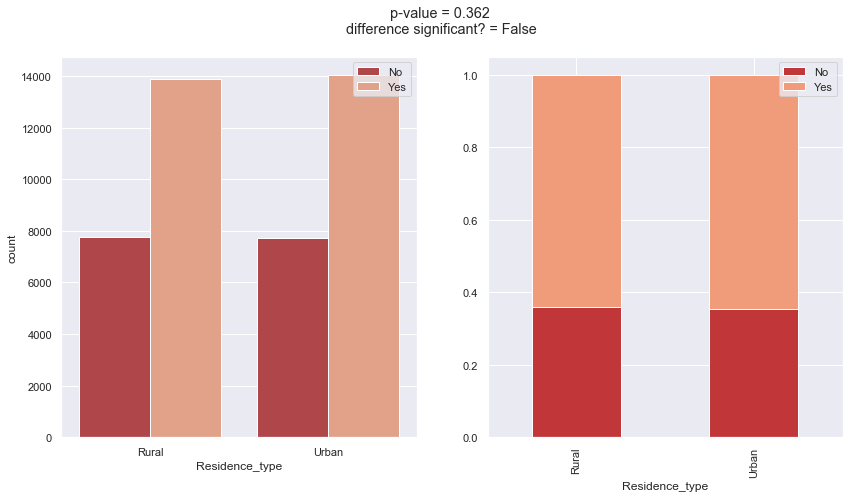

smoking_status-Ever_Married
Contingency Table:-
smoking_status  formerly smoked  never smoked  smokes
ever_married                                         
No                         1318          4682    1557
Yes                        6175         11371    5005


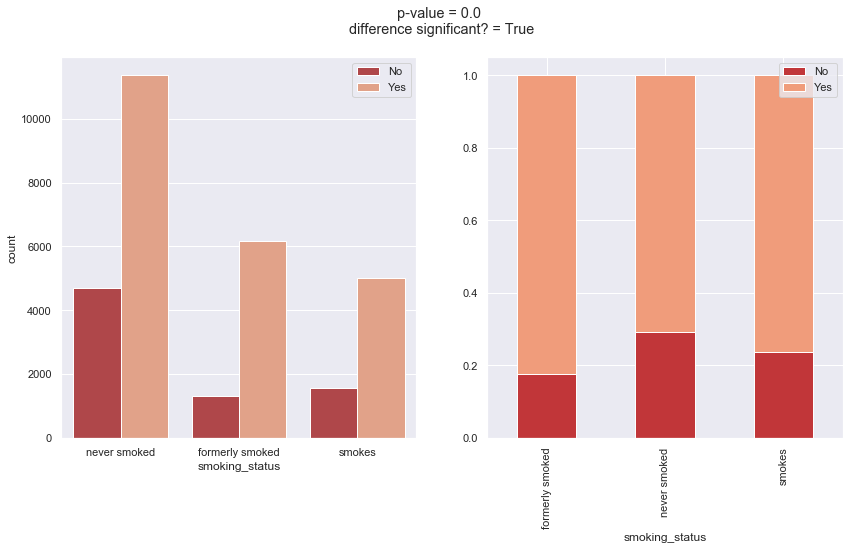

stroke-Ever_Married
Contingency Table:-
stroke            0    1
ever_married            
No            15382   80
Yes           27235  703


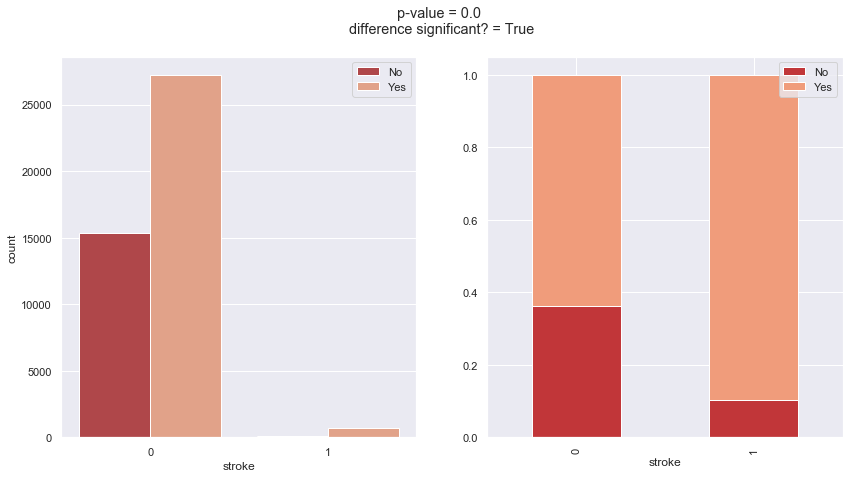

In [150]:
cols=["gender","work_type","Residence_type","smoking_status","stroke"]

for i in cols:
    print(i+"-Ever_Married")
    categorical_biv(dataset,"ever_married",i)

**Inferences-**
1. Higher proportion of Females are married than Males
2. Employed People are mostly Married
3. No impact of Residence_Type on Marriage
4. Married People Smoke
5. Married people are more likely to have a stroke

### Residence_Type vs Other Variables

gender-Residence_Type
Contingency Table:-
gender          Female  Male  Other
Residence_type                     
Rural            12816  8822      6
Urban            12849  8902      5


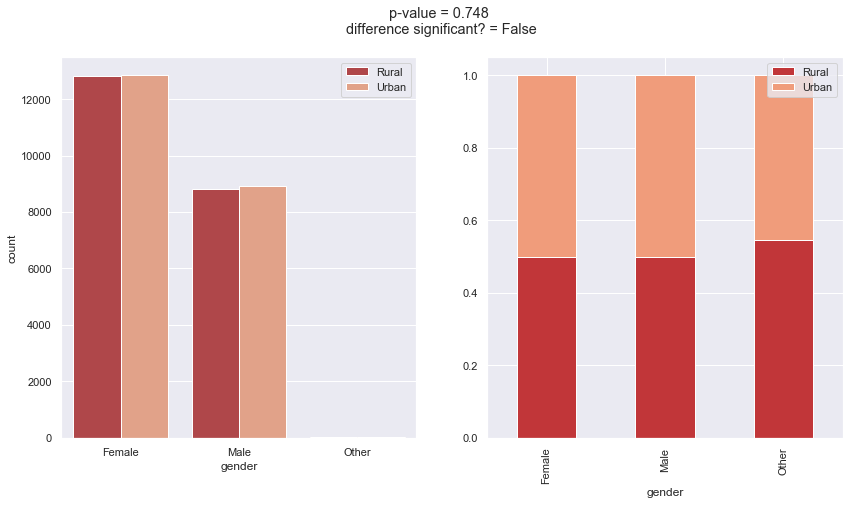

work_type-Residence_Type
Contingency Table:-
work_type       Govt_job  Never_worked  Private  Self-employed  children
Residence_type                                                          
Rural               2714            84    12320           3444      3082
Urban               2726            93    12514           3349      3074


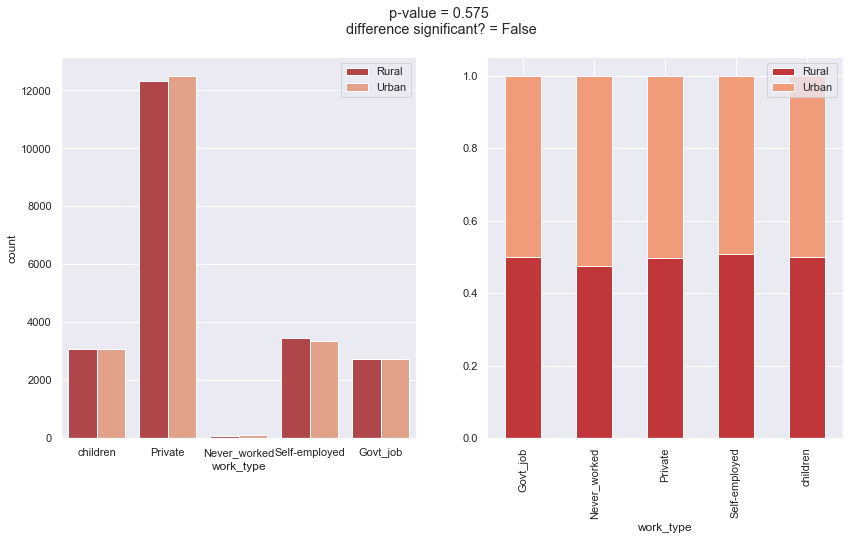

smoking_status-Residence_Type
Contingency Table:-
smoking_status  formerly smoked  never smoked  smokes
Residence_type                                       
Rural                      3772          8005    3205
Urban                      3721          8048    3357


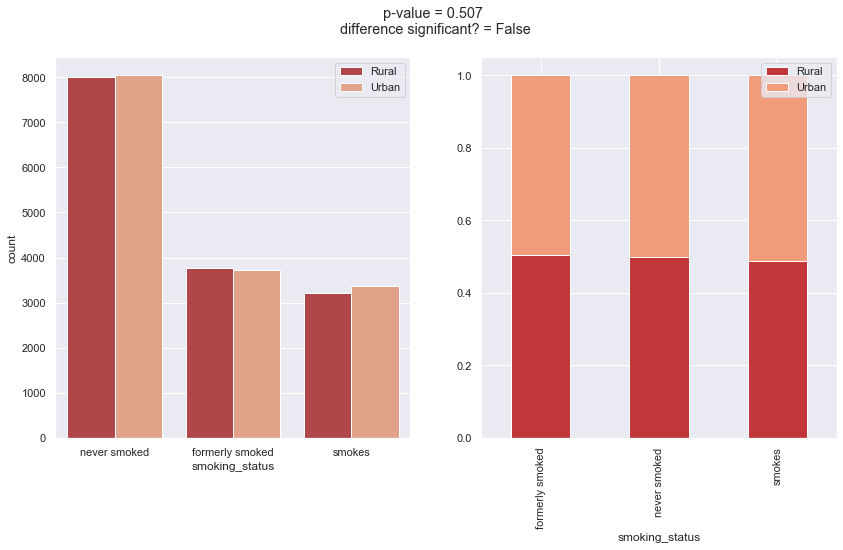

stroke-Residence_Type
Contingency Table:-
stroke              0    1
Residence_type            
Rural           21260  384
Urban           21357  399


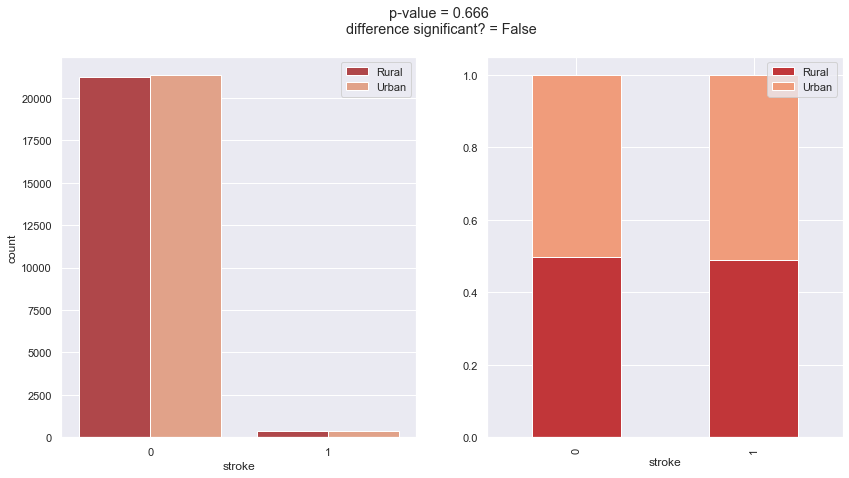

In [153]:
cols=["gender","work_type","smoking_status","stroke"]

for i in cols:
    print(i+"-Residence_Type")
    categorical_biv(dataset,"Residence_type",i)

**Inferences-**
1. Residence Type Doesn't have any effect on other Categorical Variables as well as our Target Variable

**We can think about dropping this variable.**

### Stroke vs Other Variables

gender-Stroke
Contingency Table:-
gender  Female   Male  Other
stroke                      
0        25234  17372     11
1          431    352      0


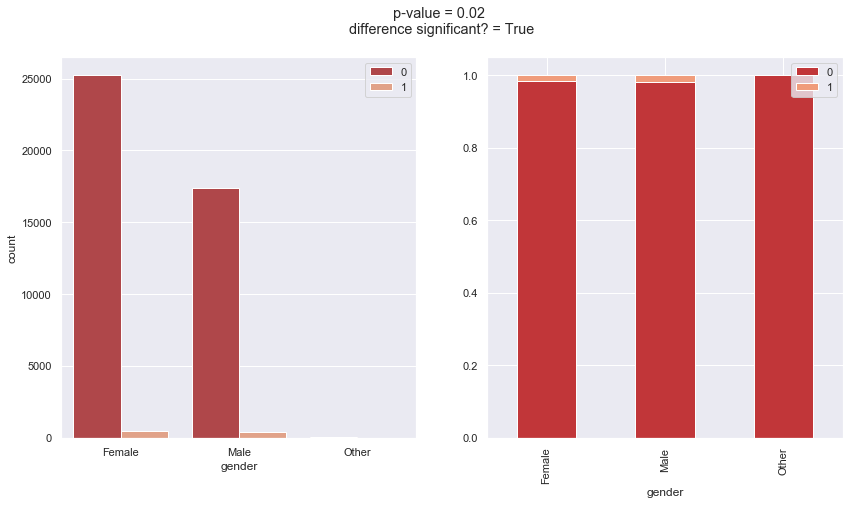

work_type-Stroke
Contingency Table:-
work_type  Govt_job  Never_worked  Private  Self-employed  children
stroke                                                             
0              5351           177    24393           6542      6154
1                89             0      441            251         2


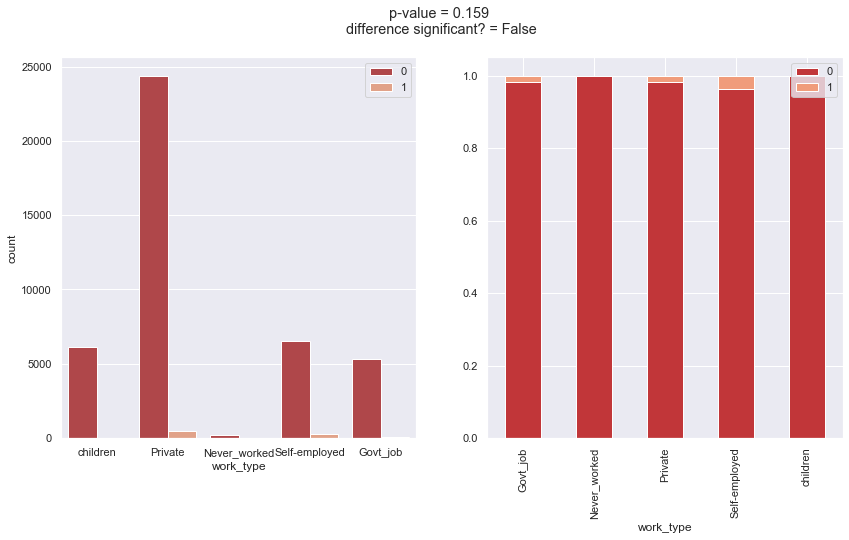

smoking_status-Stroke
Contingency Table:-
smoking_status  formerly smoked  never smoked  smokes
stroke                                               
0                          7272         15769    6429
1                           221           284     133


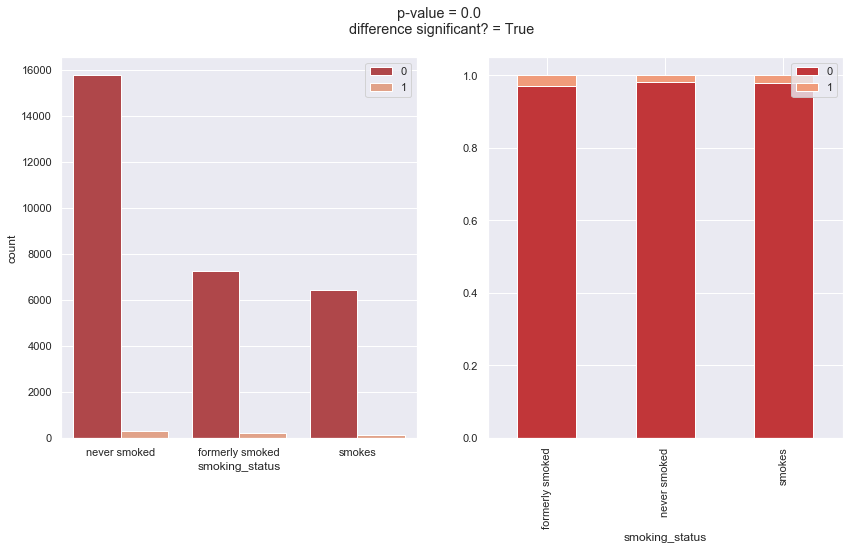

In [154]:
cols=["gender","work_type","smoking_status"]

for i in cols:
    print(i+"-Stroke")
    categorical_biv(dataset,"stroke",i)

gender-Stroke
Contingency Table:-
gender  Female   Male
stroke               
0        25234  17372
1          431    352


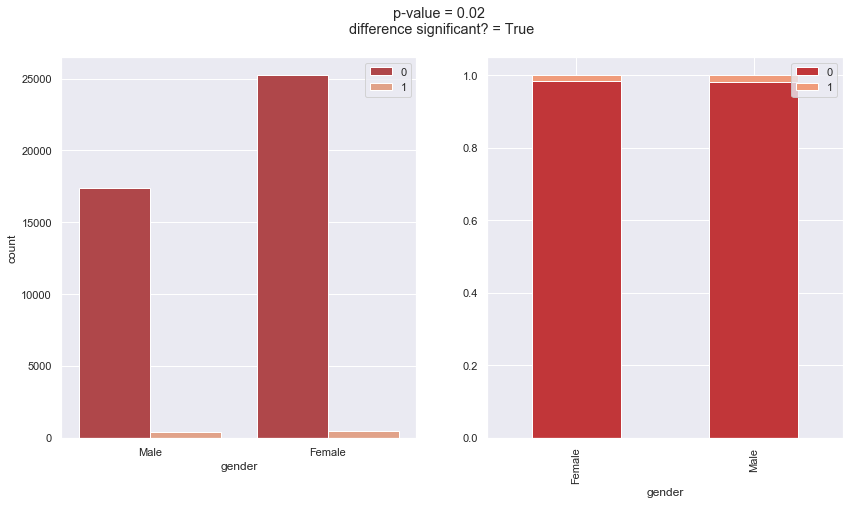

In [160]:
cols=["gender"]

dataset["gender"]=dataset["gender"].astype('object')

for i in cols:
    print(i+"-Stroke")
    categorical_biv(dataset[dataset.gender!='Other'],"stroke",i)
    
dataset["gender"]=dataset["gender"].astype('category')

**Inferences-**
1. Employment doesn't seem to have any effect on Stroke
2. Smoking_Status has an effect on stroke.
3. Males are more likely to have a stroke than Females

### Gender vs Other Variables

work_type-gender
Contingency Table:-
work_type  Govt_job  Never_worked  Private  Self-employed  children
gender                                                             
Female         3312           101    15235           4040      2977
Male           2126            76     9592           2753      3177
Other             2             0        7              0         2


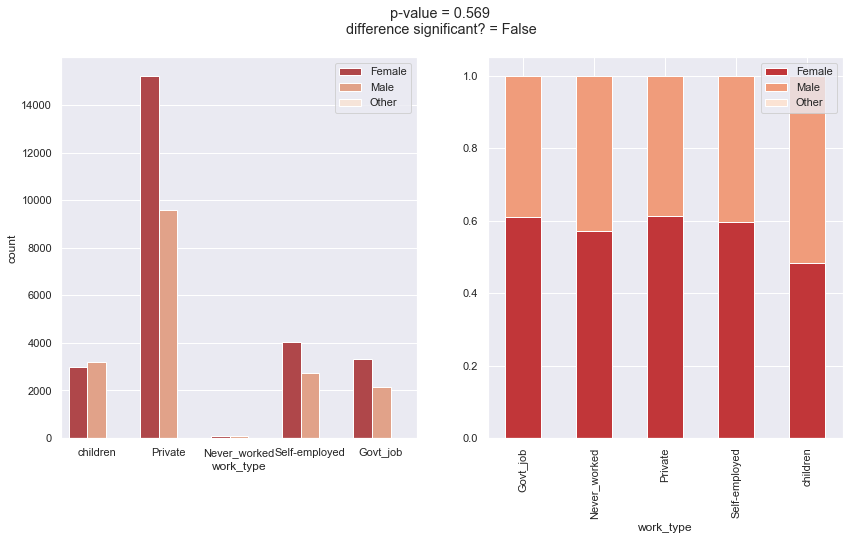

smoking_status-gender
Contingency Table:-
smoking_status  formerly smoked  never smoked  smokes
gender                                               
Female                     4117         10568    3681
Male                       3370          5483    2880
Other                         6             2       1


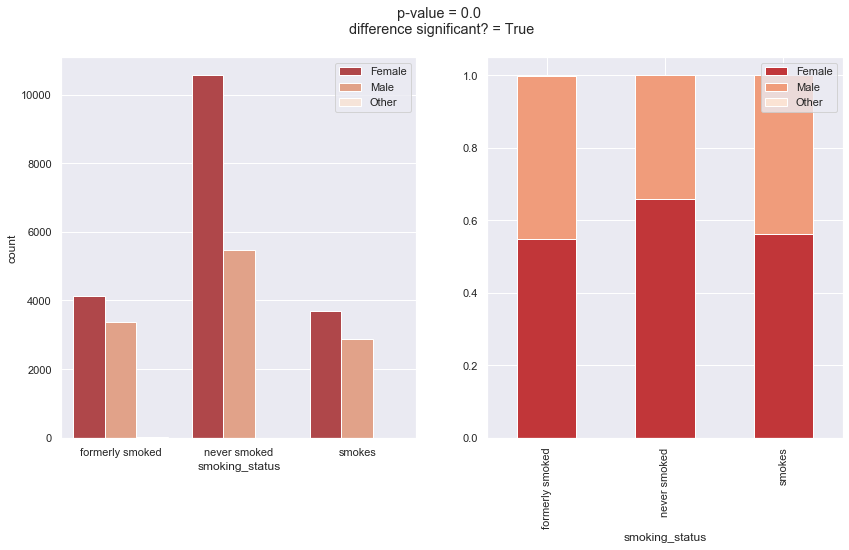

In [166]:
cols=["work_type","smoking_status"]

for i in cols:
    print(i+"-gender")
    categorical_biv(dataset,"gender",i)

**Inferences-**
1. Doesn't seem that Gender and Work_Type has a relationship. (Which is good. Promoting equality of Females. xD)
2. Relationship between smoking_status and gender

### Work_Type vs Smoking_Status

work_type-smoking_status
Contingency Table:-
work_type        Govt_job  Never_worked  Private  Self-employed  children
smoking_status                                                           
formerly smoked      1091             9     4629           1660       104
never smoked         2291            85    10452           2707       518
smokes                964             7     4504           1078         9


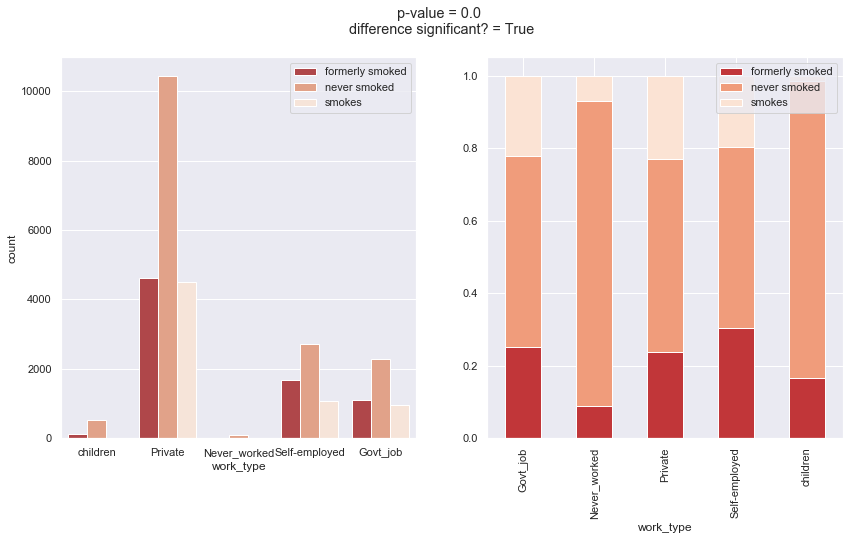

In [168]:
cols=["work_type"]

for i in cols:
    print(i+"-smoking_status")
    categorical_biv(dataset,"smoking_status",i)

**Inferences-**
1. Work effects smoking_status. Work could lead to stress.

## Numerical-Numerical 

In [169]:
dataset.corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.237627,0.358897,0.156049
avg_glucose_level,0.237627,1.000000,0.191295,0.078917
bmi,0.358897,0.191295,1.000000,0.020285
stroke,0.156049,0.078917,0.020285,1.000000


<Figure size 840x560 with 0 Axes>

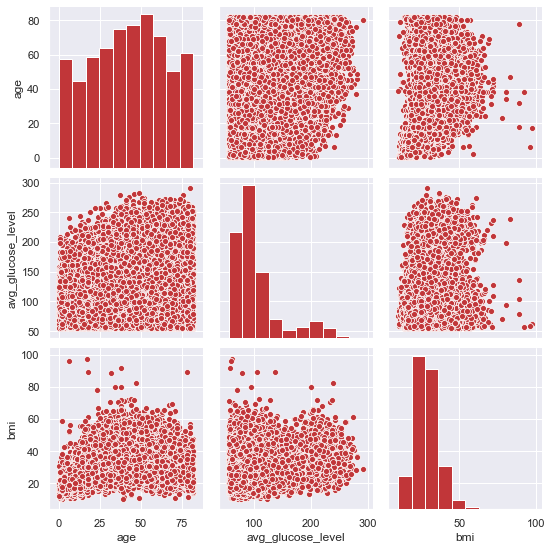

In [172]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(dataset[["age","avg_glucose_level","bmi"]])

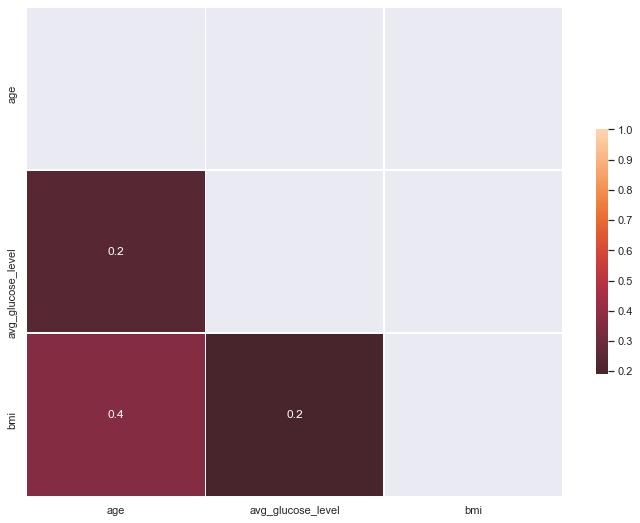

In [173]:
# Calculate the correlation matrix
df = dataset[["age","avg_glucose_level","bmi"]].copy()

corr = df.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

#sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
#            square=True, linewidths=.5, cbar_kws={"shrink": .5});

sns.heatmap(corr, vmax=1, center=0, annot=True,fmt='.1f',mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5});

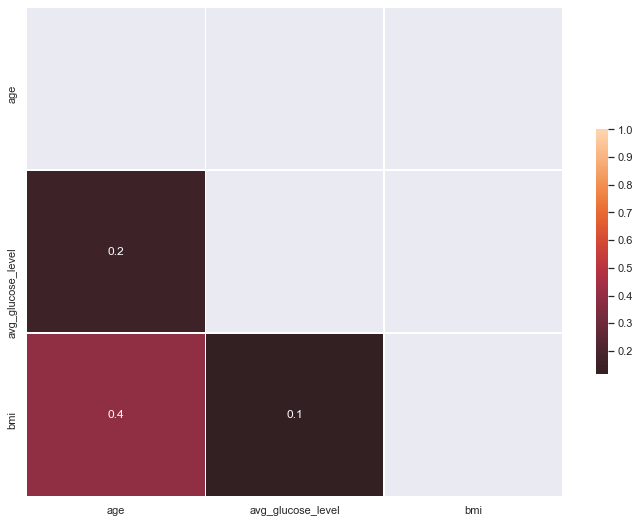

In [174]:
# Calculate the correlation matrix
df = dataset[["age","avg_glucose_level","bmi"]].copy()

corr = df.corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

#sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
#            square=True, linewidths=.5, cbar_kws={"shrink": .5});

sns.heatmap(corr, vmax=1, center=0, annot=True,fmt='.1f',mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5});

There is slight correlation between age and bmi.

## Numerical-Categorical

In [209]:
def diff_of_mean(x1,x2):
    xm1=x1.mean()
    xm2=x2.mean()
    sd1=x1.std()
    sd2=x2.std()
    n1=len(x1)
    n2=len(x2)

    sd= (sd1*sd1/n1)+(sd2*sd2/n2)

    t_stat=(xm2-xm1)/sd**0.5

    from scipy.stats import t

    p_val=round(2*(1-t.cdf(abs(t_stat),n1+n2-2)),5)
    return p_val


### Gender vs numerical_variables

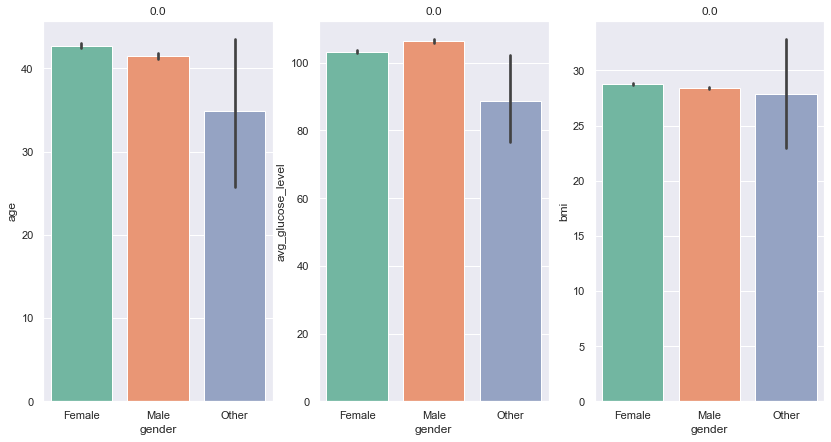

In [220]:
sns.set(palette="Set2")

cols=["age","avg_glucose_level","bmi"]

fig,ax=plt.subplots(1,3,figsize=(14,7))

for i,j in enumerate(cols):
    x1=dataset[dataset.gender=="Male"][j]
    x2=dataset[dataset.gender=="Female"][j]
    sns.barplot(x="gender",y=j, data=dataset,ax=ax[i])
    
    ax[i].set_title(str(diff_of_mean(x1,x2)))
    
    

plt.show()    
   

**Average Age, glucose level, bmi of Males and Females are significantly different from each other**

## Stroke vs Numerical Variables

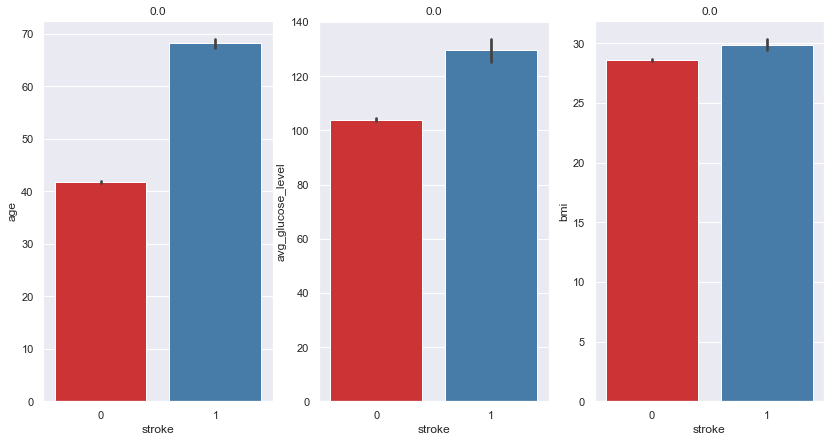

In [224]:
sns.set(palette="Set1")

cols=["age","avg_glucose_level","bmi"]

fig,ax=plt.subplots(1,3,figsize=(14,7))

for i,j in enumerate(cols):
    x1=dataset[dataset.stroke==1][j]
    x2=dataset[dataset.stroke==0][j]
    
    sns.barplot(x="stroke",y=j, data=dataset,ax=ax[i])
    
    ax[i].set_title(str(diff_of_mean(x1,x2)))
    
    

plt.show()    
    

**Average Age, glucose level, bmi of 1 and 0 stroke are significantly different from each other**